In [2]:
# Dampened/Undampened System plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math 
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

%matplotlib notebook

In [3]:
def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1
 
    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0
 
    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
 
    def f(c):
        if c == 0:
            return 0
        else:
            return intensity_max * pow (c * factor, gamma)
 
    return f(red), f(green), f(blue)

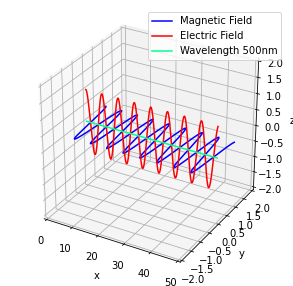

R=0.0 K=1


In [5]:
fig = plt.figure()
fig.set_size_inches(5,5)
ax = plt.axes(projection='3d')

R = 0.0
K = 1

# Data for a three-dimensional line
zeros = np.zeros(1000)
twoPi = math.pi * 2
Lambda = 500

frequency = twoPi/Lambda

amplitude = 1
timescale = 50

color = wave2rgb(Lambda)

xLimit = 0.1 * Lambda
xline = np.linspace(0, xLimit, 1000)

def animate_points3d(t):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim3d(0, xLimit)
    ax.set_ylim3d(-2* amplitude, 2* amplitude)
    ax.set_zlim3d(-2* amplitude, 2* amplitude)
    
    omegaT = frequency * t * timescale
    waveEquation = (R * np.cos(K * xline - omegaT)) + ((1 - R) * np.cos(K * xline + omegaT))
    
#     ylineMagnetism = amplitude * np.cos(xline * (frequency) + (t * timescale))
    ylineMagnetism = waveEquation
    zlineMagnetism = zeros
    
#     zlineElectric = R * amplitude * np.cos(xline * (frequency) + (t * timescale))
    ylineElectric = zeros
    zlineElectric = waveEquation
    
    ax.plot3D(xline, ylineMagnetism, zlineMagnetism, color="blue", label="Magnetic Field")
    ax.plot3D(xline, ylineElectric, zlineElectric, color="red", label="Electric Field")
    ax.plot3D(xline, zeros, zeros, color=color, label="Wavelength " + str(Lambda) + "nm")
    ax.legend()


ani3d = FuncAnimation(fig, animate_points3d, frames= 120, interval=100, repeat=True)

# ani3d.save("electromagnetism.gif", dpi=300, writer=PillowWriter(fps=120))
plt.show()
print("R=" + str(R), "K=" + str(K))